## *Table of Contents (Question 2)*

### **[Part A](#a)**
### **[Part B](#b)**
### **[Part C](#c)**
### **[Part D](#d)**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
pd.set_option('display.max_columns', None)

In [3]:
# read the data

with open('THA_diamonds.csv') as df:
    df = pd.read_csv(df, sep=',')
df.head(10)

,cut,color,depth,price,carat
0,Good,D,63.6,low,0.44
1,Fair,F,64.2,low,0.45
2,Good,I,60.4,low,0.50
3,Good,F,56.8,low,0.45
4,Fair,F,64.3,low,0.45
5,Fair,F,65.8,low,0.45
6,Good,D,63.7,low,0.45
7,Good,D,63.7,low,0.45
8,Good,D,63.2,low,0.46
9,Fair,F,64.9,low,0.50


In [4]:
# data type 

df.dtypes

cut       object
color     object
depth    float64
price     object
carat    float64
dtype: object

### Part A <a name = a></a>

The dataset has two numeric or continous feature as `depth` and `carat`. 

Here, `price` is our **target** feature, while remaining are descriptive features.

For decision tree, all variables need to be categorical.

Decision tree strats with the `root node (descriptive feature)`, then tree is splits across `unique values (branches)` of that descriptive feature to predict the `target variables (leaf node)`.
    
Here, we have to generate **`Depth 1 decision tree`** to predict `price` with **Entropy** split criterion.
    
As `depth` and `carat` are numeric features, we need to **discretize** them.

(array([ 7., 19., 20., 14., 12., 29., 83., 23.,  4.,  1.]),
 array([55.3 , 56.64, 57.98, 59.32, 60.66, 62.  , 63.34, 64.68, 66.02,
        67.36, 68.7 ]),
 <a list of 10 Patch objects>)

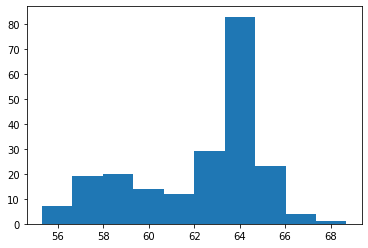

In [5]:
# histogram of depth 

plt.hist(df["depth"])

(array([ 1.,  8., 54., 16., 14., 67., 11.,  9., 26.,  6.]),
 array([0.32 , 0.389, 0.458, 0.527, 0.596, 0.665, 0.734, 0.803, 0.872,
        0.941, 1.01 ]),
 <a list of 10 Patch objects>)

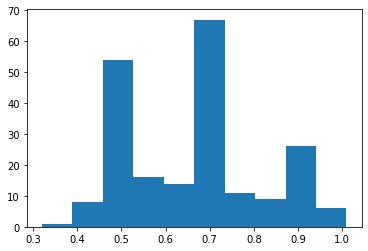

In [6]:
# histogram of carat

plt.hist(df["carat"])

Here, I have shown equal width Histogram of `depth` and `carat` variables.

But, we need to **discretize** them with `3 equal frequency`. For that, I have used **qcut** function & assign them 3 categories such as **category_1**, **category_2** and **category_3**.

In [7]:
# discretize depth and carat into 3 category

category = ["category_1","category_2","category_3"]
df["depth"] = pd.qcut(df["depth"],3,category)
df["carat"] = pd.qcut(df["carat"],3,category)

In [8]:
# show counts of each category

print(df["depth"].value_counts())
print("\n")
print(df["carat"].value_counts())

category_2    74
category_1    71
category_3    67
Name: depth, dtype: int64


category_2    79
category_1    71
category_3    62
Name: carat, dtype: int64


After discretize, counts of each category for both depth and carat features are `approximately same`.

(array([74.,  0.,  0.,  0.,  0., 67.,  0.,  0.,  0., 71.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

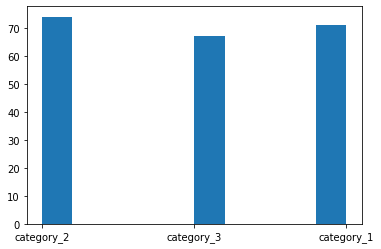

In [9]:
# histogram of depth after discretize

plt.hist(df["depth"])

(array([71.,  0.,  0.,  0.,  0., 79.,  0.,  0.,  0., 62.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

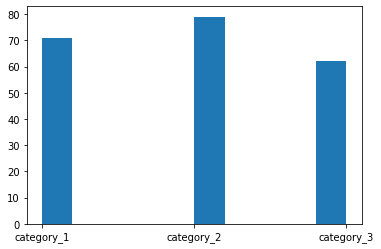

In [10]:
# histogram of carat after discretize

plt.hist(df["carat"])

After discretize, I moved the target variable `price` to the last, as it is standard practice and showed the first 10 observations.

In [11]:
# repositioning the target variable price and showing first 10 records

df = df[["cut","color","depth","carat","price"]]
df.head(10)

,cut,color,depth,carat,price
0,Good,D,category_2,category_1,low
1,Fair,F,category_3,category_1,low
2,Good,I,category_1,category_1,low
3,Good,F,category_1,category_1,low
4,Fair,F,category_3,category_1,low
5,Fair,F,category_3,category_1,low
6,Good,D,category_2,category_1,low
7,Good,D,category_2,category_1,low
8,Good,D,category_2,category_1,low
9,Fair,F,category_3,category_1,low


In [12]:
df.dtypes

cut        object
color      object
depth    category
carat    category
price      object
dtype: object

Here, as we can see, the `depth` and `carat` variables are now of category type which were float64 originally.

### Part B <a name = "b"></a>

The node impurity is a measure of the homogeneity of the labels at the node.

To find the Impurity of price, I used Entropy criteria.

Claude Shannon’s entropy model defines a computational measure of the impurity of the elements of a set.

Entropy is `uncertainity` of guessing the result for random pick.

$$ H(t) = -1\sum_{i=1}^n (P(t=i)×log2(P(t=i))) $$
Where,

**n** = number of possible outcomes

In [13]:
# function defination of impurity, which will find the impurity of variable from entropy method

def impurity(attribute):
    probability = attribute.value_counts(normalize=True)
    impurity = -1 * np.sum(probability * np.log2(probability))
    return((impurity).round(3))

# impurity of price
print(impurity(df["price"]))

1.716


Impurity of price variable is **1.716**

### Part C <a name = "c"></a>


Here, task is to determine the **`root`** node for the decision tree.

To determine the root node, we will look at the information gain of each descriptive feature. We will select the feature with **`highest information gain`** as **root node** for decision tree. If we consider that feature as root node, then it is more likely to have `pure subsets` of target feature rather than considering any other node as root node.

Information gain is measure of reduction in overall entropy.

**Information Gain** can be calculated by following eqations.

$$H(t,D) =−1\sum_{l ∈ levels(t)}(P(t=l)×log_{2}(P(t=l)))$$

$$rem(d,D) = \sum_{l ∈ levels(d)}\frac{|D_{d=l}|}{|D|}× H(t,D_{d=l})$$

$$IG(d,D) =H(t,D)−rem(d,D)$$

where, 

**H(t,D)** = entropy of target feature,
       
   **rem(d,D)** = remaining impurity,
       
   **IG(d,D)** = information gain
   
   **$\frac{|D_{d=l}|}{|D|}$** = weighting
   
   $H(t,D_{d=l})$ = entropy of partition $D_{d=l}$
   
   **D** = original data
   
   $D_{d=l}$ = subset of data for respective level 
   
   
   
First, I created `subset for each level of descriptive features` and then I find the **impurity** of target variable `price for each subset`. 

Then, I find `weight for each subset` with eqation `lenght of each subset/length of original data`.

Then, I find `remaining impurity` for `each descriptive feature` by above **rem(d,D)** equation.

After that, I find `information gain` for `each descriptive feature` by `subtracting remaining impurity of respective feature from price entropy`.

In [14]:
# find remainder and information gain for each descriptive feature to determine the root node of the tree.

price_entropy = round(impurity(df["price"]),3)
split = []
remainder = []
info_gain = []

for index in df.iloc[:,0:4]:  # for loop for every descriptive feature
    impurity_list = list()    # creating impurity list and weight to store impurity and weight for each category for each feature
    weight_list = list()
    split.append(index)       # appending feature name to the split list
   
    for category in df[index].unique():  # for loop for each unique value of respective feature
        print("\n" + category)
        df_category = df[df[index] == category]   # defining subset for each unique value of respective feature
        print("Partial Data for " + category +" category of " +  index + " attribute")
        print(df_category.head())                 # printing the subset for each unique value of respective feature
        
        # finding impurity for the target variable price from each subset with entropy method
        impurity_ = round(impurity(df_category["price"]),3)
        
        # finding weight for each unique value of respective feature
        weight = round((len(df_category))/(len(df)),3)
        
        # appending impurity and weight of each category of respective feature to list
        impurity_list.append(impurity_)
        weight_list.append(weight)

    # showing Impurity and Weight    
    print("\n")
    print("Impurity of " + index + " split" , impurity_list)
    print("Weight of " + index + " split", weight_list)

    # finding and printing the remaining impurity
    print("\n")
    remaining_impurity = round(np.sum(np.array(impurity_list) * np.array(weight_list)),3)
    print("remaining impurity of " + index +":" , remaining_impurity)

    # finding and printing the imformation gain
    print("\n")
    information_gain = round(price_entropy - remaining_impurity,3)
    print("information gain of " + index + ":", information_gain)
    
    # appending remaining impurity and information gain to the respective lists
    remainder.append(remaining_impurity)
    info_gain.append(information_gain)
    
    print("--------------------------------------------------------------------------------")



Good
Partial Data for Good category of cut attribute
    cut color       depth       carat price
0  Good     D  category_2  category_1   low
2  Good     I  category_1  category_1   low
3  Good     F  category_1  category_1   low
6  Good     D  category_2  category_1   low
7  Good     D  category_2  category_1   low

Fair
Partial Data for Fair category of cut attribute
     cut color       depth       carat price
1   Fair     F  category_3  category_1   low
4   Fair     F  category_3  category_1   low
5   Fair     F  category_3  category_1   low
9   Fair     F  category_3  category_1   low
12  Fair     D  category_1  category_1   low


Impurity of cut split [1.68, 1.78]
Weight of cut split [0.717, 0.283]


remaining impurity of cut: 1.708


information gain of cut: 0.008
--------------------------------------------------------------------------------

D
Partial Data for D category of color attribute
     cut color       depth       carat price
0   Good     D  category_2  category_1   l

I created the data frame **df_splits**.

In [15]:
# creat the data_fram df_splits

df_splits = pd.DataFrame(list(zip(split, remainder, info_gain)),
               columns =["split", "remainder","info_gain"])
df_splits

,split,remainder,info_gain
0,cut,1.708,0.008
1,color,1.617,0.099
2,depth,1.665,0.051
3,carat,0.956,0.760


In [16]:
# adding the column is_optimal to df_splits

df_splits['is_optimal'] = np.where(df_splits['info_gain']== max(df_splits["info_gain"]), True, False)
df_splits

,split,remainder,info_gain,is_optimal
0,cut,1.708,0.008,False
1,color,1.617,0.099,False
2,depth,1.665,0.051,False
3,carat,0.956,0.760,True


From the dataframe **df_splits**, carat has **highest info_gain**, so, our root node for depth 1 decision tree will be **`carat`**.

It means that, if we select **`carat`** as **root node**, then it is more likely that we would have **`pure subsets`** of target variable where each subset have the same `classification`.

### Part D <a name = "d"></a>

Here, I have taken `carat` as a **root node**. Then, I created subset for every level of `carat variable` ***(category_1, category_2, category_3)*** .  

Then, I find probability of each level of `target variable` ***(low, medium, high, premium)*** within each carat level.

In [17]:
# creat lists
leaf_condition = []
low_price_prob  = []
medium_price_prob = []
high_price_prob = []
premium_price_prob = []


for index in df["carat"].unique(): # creating for loop for every category of carat
    leaf_condition.append(index)   # appending the category name
    print(index)
    df_leaf_condition = df[df["carat"] == index]  # creatinf subset of every carat category
    print(len(df_leaf_condition))
    print(df_leaf_condition.head())
    
    # finding the probability of each unique value of price for every category of carat
    low_price_ = round((len(df_leaf_condition[df_leaf_condition["price"]=="low"])/len(df_leaf_condition)),3)
    medium_price_ = round((len(df_leaf_condition[df_leaf_condition["price"]=="medium"])/len(df_leaf_condition)),3)
    high_price_ = round((len(df_leaf_condition[df_leaf_condition["price"]=="high"])/len(df_leaf_condition)),3)
    premium_price_ = round((len(df_leaf_condition[df_leaf_condition["price"]=="premium"])/len(df_leaf_condition)),3)

    # appending the probability to respected list
    low_price_prob.append(low_price_)
    medium_price_prob.append(medium_price_)
    high_price_prob.append(high_price_)
    premium_price_prob.append(premium_price_)

category_1
71
    cut color       depth       carat price
0  Good     D  category_2  category_1   low
1  Fair     F  category_3  category_1   low
2  Good     I  category_1  category_1   low
3  Good     F  category_1  category_1   low
4  Fair     F  category_3  category_1   low
category_2
79
     cut color       depth       carat price
11  Good     I  category_2  category_2   low
15  Good     I  category_2  category_2   low
16  Good     I  category_2  category_2   low
27  Fair     I  category_1  category_2   low
34  Fair     I  category_1  category_2   low
category_3
62
      cut color       depth       carat   price
99   Good     I  category_2  category_3  medium
103  Good     I  category_2  category_3  medium
105  Good     I  category_1  category_3  medium
119  Fair     I  category_3  category_3  medium
124  Fair     I  category_3  category_3  medium


In [18]:
# creating data_frame df_pred

df_pred = pd.DataFrame(list(zip(leaf_condition, low_price_prob, medium_price_prob, high_price_prob, premium_price_prob)),
               columns =["leaf_condition", "low_price_prob","medium_price_prob","high_price_prob","premium_price_prob"])
df_pred

,leaf_condition,low_price_prob,medium_price_prob,high_price_prob,premium_price_prob
0,category_1,1.000,0.000,0.000,0.000
1,category_2,0.278,0.608,0.101,0.013
2,category_3,0.000,0.419,0.371,0.210


To find the `leaf_prediction` of price variable, we check the `highest probabilty of price level within each carat category`, for instance, low_price_prob is highest within category_1 carat, so leaf_prediction of category_1 carat would be low price.

medium_price_prob is highest for category_2 carat, so leaf_prediction will be medium.

In [19]:
# adding column leaf_prediction to df_pred

prediction = ["low price", "medium price", "medium price"]
df_pred['leaf_prediction'] = prediction
df_pred

,leaf_condition,low_price_prob,medium_price_prob,high_price_prob,premium_price_prob,leaf_prediction
0,category_1,1.000,0.000,0.000,0.000,low price
1,category_2,0.278,0.608,0.101,0.013,medium price
2,category_3,0.000,0.419,0.371,0.210,medium price


Above data-frame depicts that, if carat is of `category_1`, then it is `100% from low price category`, there is `pure subset` for category_1 carat.

but, if carat is of `category_2`, then it is `60% chance that, it has medium price`. 

While, for `category_3` carat, there is `0% chance that diamond has low price`.